<a href="https://colab.research.google.com/github/FarnazG/dsc-capstone-project-v2-online-ds-ft-120919/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libreries:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

Using TensorFlow backend.


# Importing the dataset:

In [0]:
#importing the Dataset
data= pd.read_csv('/content/drive/My Drive/Capstone Project/current_farfetch_listings.csv')

In [0]:
data.head()

,Unnamed: 0,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabel,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,priceInfo.isOnSale,shortDescription,stockTotal
0,0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NaN,NoTag,9359,SGD,NaN,1080,"$1,080","$1,080",1080,NaN,False,logo print strap sandals,130
1,1,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,NaN,NoTag,9319,SGD,20% Off,392,$392,$490,490,NaN,True,embroidered midi dress,14
2,2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NaN,NoTag,9140,SGD,NaN,1245,"$1,245","$1,245",1245,NaN,False,FendiMania sock style sneakers,68
3,3,"[{'scaleId': 0, 'size': 'One Size'}]",49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NaN,NoTag,9031,SGD,20% Off,308,$308,$385,385,NaN,True,top zip wallet,1
4,4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NaN,NoTag,9339,SGD,NaN,1248,"$1,248","$1,248",1248,NaN,False,slingback 65 pumps,78


# **Data cleaning:**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       188637 non-null  int64  
 1   availableSizes                   162575 non-null  object 
 2   brand.id                         188637 non-null  int64  
 3   brand.name                       188637 non-null  object 
 4   gender                           188637 non-null  object 
 5   hasSimilarProducts               188637 non-null  bool   
 6   id                               188637 non-null  int64  
 7   images.cutOut                    188637 non-null  object 
 8   images.model                     188637 non-null  object 
 9   isCustomizable                   188637 non-null  bool   
 10  merchandiseLabel                 56375 non-null   object 
 11  merchandiseLabelField            188637 non-null  object 
 12  me

In [0]:
data.isna().sum()

Unnamed: 0                              0
availableSizes                      26062
brand.id                                0
brand.name                              0
gender                                  0
hasSimilarProducts                      0
id                                      0
images.cutOut                           0
images.model                            0
isCustomizable                          0
merchandiseLabel                   132262
merchandiseLabelField                   0
merchantId                              0
priceInfo.currencyCode                  0
priceInfo.discountLabel            120386
priceInfo.finalPrice                    0
priceInfo.formattedFinalPrice           0
priceInfo.formattedInitialPrice         0
priceInfo.initialPrice                  0
priceInfo.installmentsLabel        188637
priceInfo.isOnSale                      0
shortDescription                        0
stockTotal                              0
dtype: int64

**Deleting unnecessary rows with missing data:**
1. instalmentsLabel column
2. discountLabel column
3. merchandiseLabel	column
4. availableSizes column


In [0]:
data= data.drop(['priceInfo.installmentsLabel','priceInfo.discountLabel','merchandiseLabel','availableSizes'], axis=1)

In [0]:
data.head()

,Unnamed: 0,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
0,0,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NoTag,9359,SGD,1080,"$1,080","$1,080",1080,False,logo print strap sandals,130
1,1,2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,NoTag,9319,SGD,392,$392,$490,490,True,embroidered midi dress,14
2,2,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NoTag,9140,SGD,1245,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68
3,3,49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NoTag,9031,SGD,308,$308,$385,385,True,top zip wallet,1
4,4,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,SGD,1248,"$1,248","$1,248",1248,False,slingback 65 pumps,78


# **Data extraction:**

Our dataset is huge and based on home run computers capacities, we are not able to process the entire dataset, so we start investigating the dataset to extract a smaller dataset out of it.

In [0]:
data['brand.name'].value_counts()

Chanel Pre-Owned         2605
Prada                    2516
Gucci                    2494
Saint Laurent            2490
Dolce & Gabbana          2337
                         ... 
Evi Grintela                1
Le Nine                     1
Brumal                      1
Stussy                      1
Mario Borsato Vintage       1
Name: brand.name, Length: 2334, dtype: int64

# remove rows of 'brand.name' that has less than 2000 count frequency:

In [0]:
df=data.groupby('brand.name').filter(lambda x : len(x)>2000)
df['brand.name'].value_counts()

Chanel Pre-Owned    2605
Prada               2516
Gucci               2494
Saint Laurent       2490
Dolce & Gabbana     2337
Name: brand.name, dtype: int64

In [0]:
df.head()

,Unnamed: 0,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
4,4,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,SGD,1248,"$1,248","$1,248",1248,False,slingback 65 pumps,78
6,6,25354,Gucci,women,True,12562558,https://cdn-images.farfetch-contents.com/12/56...,https://cdn-images.farfetch-contents.com/12/56...,False,NoTag,10952,SGD,3740,"$3,740","$3,740",3740,False,Green Dionysus GG small velvet shoulder bag,61
8,8,25354,Gucci,women,False,12165273,https://cdn-images.farfetch-contents.com/12/16...,https://cdn-images.farfetch-contents.com/12/16...,False,NoTag,10952,SGD,810,$810,$810,810,False,GG Marmont Matelasse wallet,8
24,24,547344,Saint Laurent,women,True,14031212,https://cdn-images.farfetch-contents.com/14/03...,https://cdn-images.farfetch-contents.com/14/03...,False,NewSeason,9140,SGD,399,$399,$399,399,False,logo print t-shirt,282
30,30,547344,Saint Laurent,women,True,13744152,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NoTag,12161,SGD,420,$420,"$1,050",1050,True,contrast flared jeans,22


In [0]:

df.shortDescription.value_counts()


floral print scarf                  26
Tribute sandals                     23
quilted shoulder bag                19
logo plaque wallet                  18
chain shoulder bag                  18
                                    ..
mid waist tight slim fit jeans       1
studded comic print bag              1
Ophidia GG french flap wallet        1
embellished evening dress            1
CHANEL Quilted CC Chain Backpack     1
Name: shortDescription, Length: 9694, dtype: int64

## Splitting words in description column and keep the clothing related items and drop the rest:

In [0]:
def drop_rows(df):
  item_list= ["skirt","blouse","top","trusers","dress","coat","jacket","blazer"]#"belt","scarf","sandals","boots","bag"
  rows_to_be_deleted=[]
  counter=0
  for dsc in df["shortDescription"]:
    words = dsc.split()          
    if(words[-1] not in item_list):
      rows_to_be_deleted.append(df.index[counter])
    counter=counter+1
 
  return rows_to_be_deleted

In [0]:
rows_to_be_deleted = drop_rows(df)
df=df.drop(rows_to_be_deleted, inplace=False)
df


,Unnamed: 0,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
41,41,3440,Dolce & Gabbana,women,True,13951532,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,NewSeason,9359,SGD,1124,"$1,124","$1,124",1124,False,Geranium print mini dress,38
57,57,25354,Gucci,women,True,13579955,https://cdn-images.farfetch-contents.com/13/57...,https://cdn-images.farfetch-contents.com/13/57...,False,NoTag,9359,SGD,2200,"$2,200","$2,200",2200,False,Stirrups print blouse,13
302,122,547344,Saint Laurent,women,True,14031265,https://cdn-images.farfetch-contents.com/14/03...,https://cdn-images.farfetch-contents.com/14/03...,False,NewSeason,9359,SGD,2620,"$2,620","$2,620",2620,False,Zebra print peplum skirt,4
308,128,3440,Dolce & Gabbana,women,True,13951202,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,NewSeason,9359,SGD,3200,"$3,200","$3,200",3200,False,Lily print flounce dress,18
456,96,3440,Dolce & Gabbana,women,True,13922305,https://cdn-images.farfetch-contents.com/13/92...,https://cdn-images.farfetch-contents.com/13/92...,False,NoTag,9541,SGD,4273,"$4,273","$4,273",4273,False,graffiti art print jacket,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186726,66,547344,Saint Laurent,women,True,11279310,https://cdn-images.farfetch-contents.com/11/27...,https://cdn-images.farfetch-contents.com/11/27...,False,NoTag,12140,SGD,2556,"$2,556","$2,556",2556,False,military field jacket,2
187068,48,547344,Saint Laurent,women,True,11218629,https://cdn-images.farfetch-contents.com/11/21...,https://cdn-images.farfetch-contents.com/11/21...,False,NoTag,10952,SGD,3580,"$3,580","$3,580",3580,False,classic teddy jacket,14
187778,38,3440,Dolce & Gabbana,women,True,10935815,https://cdn-images.farfetch-contents.com/10/93...,https://cdn-images.farfetch-contents.com/10/93...,False,NoTag,10147,SGD,1817,"$1,817","$1,817",1817,False,strappy corset dress,4
187812,72,57889,Chanel Pre-Owned,women,False,10887098,https://cdn-images.farfetch-contents.com/10/88...,https://cdn-images.farfetch-contents.com/10/88...,False,NoTag,9680,SGD,829,$829,$829,829,False,bouclé pencil skirt,1


**Checking images:**

our images are in format of URL links, so it cant be shown as above.

**To Read Image from URL and view it using Pyplot:**


In [0]:
def show_image_from_url(image_url):  
  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb), plt.axis('off')

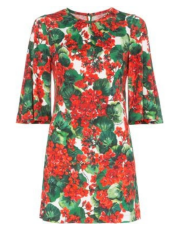

In [0]:
plt.figure()
show_image_from_url(df['images.cutOut'].loc[41])

In [0]:
# reset the index:
df=df.reset_index(drop=True)
print(df.shape)
df.head()

(2598, 19)


,Unnamed: 0,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
0,41,3440,Dolce & Gabbana,women,True,13951532,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,NewSeason,9359,SGD,1124,"$1,124","$1,124",1124,False,Geranium print mini dress,38
1,57,25354,Gucci,women,True,13579955,https://cdn-images.farfetch-contents.com/13/57...,https://cdn-images.farfetch-contents.com/13/57...,False,NoTag,9359,SGD,2200,"$2,200","$2,200",2200,False,Stirrups print blouse,13
2,122,547344,Saint Laurent,women,True,14031265,https://cdn-images.farfetch-contents.com/14/03...,https://cdn-images.farfetch-contents.com/14/03...,False,NewSeason,9359,SGD,2620,"$2,620","$2,620",2620,False,Zebra print peplum skirt,4
3,128,3440,Dolce & Gabbana,women,True,13951202,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,NewSeason,9359,SGD,3200,"$3,200","$3,200",3200,False,Lily print flounce dress,18
4,96,3440,Dolce & Gabbana,women,True,13922305,https://cdn-images.farfetch-contents.com/13/92...,https://cdn-images.farfetch-contents.com/13/92...,False,NoTag,9541,SGD,4273,"$4,273","$4,273",4273,False,graffiti art print jacket,1


In [0]:
df['priceInfo.initialPrice'].value_counts()

1531     36
1750     30
4344     27
1312     26
1094     25
         ..
891       1
1542      1
13834     1
2932      1
3235      1
Name: priceInfo.initialPrice, Length: 905, dtype: int64

# **Save cleaned dataframe for use in other notebooks:**

We are apt to save the current final cleaned version of the dataset as another csv files as "df.csv"

In [0]:
df.to_csv('df.csv')
!cp df.csv "/content/drive/My Drive/Capstone Project"

**To download URL images and import it as a numpy array:**

In [0]:
def image_processing(image_url):

  """
  Converts the URL of any image to an array of size 400x300x1 for grayscale and 400x300x3 for colored GRB
  The array represents an OpenCV grayscale version will be faster to download but we want rgb of the original image
  
  """

  #Download from image url and import it as a numpy array
  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")                         

  #Read the numpy arrays as color images in OpenCV
  image_rgb = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

  #Resize the image to smaller pixel sizes, in this case the image will be deformed so we keep its original size 400*300*3
  #image_400x300x3 = cv2.resize(image_rgb, (400, 300))

  #Save image as in form of array of 36000x1
  image_rgb= image_rgb.flatten()
  return image_rgb

In [0]:
# because the dataset is large, we download and save the data in chunks of 1000:
image_list = []
counter = 0
for url in df['images.cutOut']:
  print(counter, " ", url)
  counter = counter + 1
  image_list.append(image_processing(url))
  if counter==1000:
    X = np.array(image_list)
    #X = X/255
    X = np.save('/content/drive/My Drive/Capstone Project/X_rgb_df1000.npy', X)
    image_list = []
  if counter==2000:
    X = np.array(image_list)
    #X = X/255
    X = np.save('/content/drive/My Drive/Capstone Project/X_rgb_df2000.npy', X)
    image_list = []


print("done!")
X = np.array(image_list)
#X = X/255
X = np.save('/content/drive/My Drive/Capstone Project/X_rgb_df2598.npy', X)

to change the colored images into grayscale to make the process faster:

In [0]:
import numpy as np
import cv2

X = np.load('/content/drive/My Drive/Capstone Project/X_rgb_df2598.npy')
X_gray=[]

for i in range(0,598):
  image = X[i].reshape((400,300,3))
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray = image_gray.flatten()
  X_gray.append(image_gray)

X = np.save('/content/drive/My Drive/Capstone Project/X_gray_df2598.npy', X_gray)

type(X)


NoneType

After downloading url images and save them, we move to the next round of preprocessing which is loading the images to work with them.

**Check the gray scale saved image:**

(<matplotlib.image.AxesImage at 0x7fd501c28780>, (-0.5, 299.5, 399.5, -0.5))

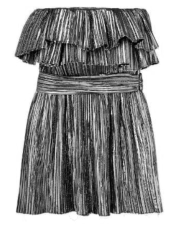

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

X_gray = np.load('/content/drive/My Drive/Capstone Project/X_gray_df2598.npy')

plt.figure()
image = X_gray[3].reshape((400,300))
plt.imshow(image, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f0b178f2518>, (-0.5, 299.5, 399.5, -0.5))

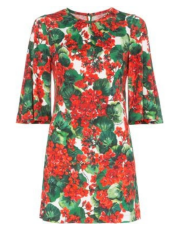

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

plt.figure()
image = Y[0].reshape((400,300,3))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')